# LEAD SCORING  CASE STUDY

# 

### 1. IMPORTING IMPORTANT LIBRARIES AND SUPRESSING THE WARNINGS

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. LOADING AND INSPECTING THE DATA

In [2]:
data= pd.read_csv('Leads.csv')

In [3]:
# inspecting the data
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# displaying all columns
pd.set_option('display.max_columns', 200)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.shape

# so our dataset has 9240 rows and 37 columns

(9240, 37)

In [6]:
# inspecting the data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 3. CLEANING AND PREPROCESSING THE DATA

In [8]:
# converting data to a suitable format for easy analysis
# converting all the characters to lowercase so as to remove duplicates.

data = data.applymap(lambda x:x.lower() if type(x) == str else x )

In [9]:
#since there are columns where select is default value when there is no input
# replacing 'Select' values with NaN

data = data.replace('select',np.nan)

In [10]:
# checking the null values 
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# finding the percentage of missing values in each column.

round((data.isnull().sum()/data.shape[0])*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [12]:
# removing the columns with more than 30% missing values except specialization as it seems important.

data = data.drop(['How did you hear about X Education','Lead Profile','City','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Quality'],axis=1)
data.shape


(9240, 28)

In [13]:
# again inspecting the missing values after dropping

round((data.isnull().sum()/data.shape[0])*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                               

In [14]:
# checking for columns with only one unique value.
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [15]:
# removing the columns with only one unique value as it doesnt help with analysis.

data = data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

data.shape

(9240, 23)

In [16]:
round((data.isnull().sum()/data.shape[0])*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Newspaper Article                                 0.000
X Education Forums                              

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# removing columns irrelevant to our analysis

data = data.drop(['Lead Number','Prospect ID'], axis = 1)

#### Columns like country , specialization , What is your current occupation and What matters most to you in choosing a course have a lot of missing values so replacing the missing values with a categorical variable.

In [19]:
data.Specialization = data['Specialization'].fillna('empty')
data.Country = data['Country'].fillna('empty')
data['What is your current occupation'] = data['What is your current occupation'].fillna('empty')
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('empty')

In [20]:
round((data.isnull().sum()/data.shape[0])*100,3)

Lead Origin                                      0.000
Lead Source                                      0.390
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.483
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.483
Last Activity                                    1.115
Country                                          0.000
Specialization                                   0.000
What is your current occupation                  0.000
What matters most to you in choosing a course    0.000
Search                                           0.000
Newspaper Article                                0.000
X Education Forums                               0.000
Newspaper                                        0.000
Digital Advertisement                            0.000
Through Re

In [21]:
# checking all the countries present in country column.
data.Country.value_counts()

india                   6492
empty                   2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [22]:
# as the country data is imbalanced towards india and empty 
# so it would be better to sum up all other countries to a same categorical variable

data.Country = data['Country'].apply(lambda x:x if x=='india' or x=='empty'  else 'not_india')

In [23]:
# now country has only 3 variables
data.Country.value_counts()

india        6492
empty        2461
not_india     287
Name: Country, dtype: int64

In [24]:
# removing the rows with missing values
data = data[data.isnull().sum(axis=1) < 1]

In [25]:
# checking the missing values again

round((data.isnull().sum()/data.shape[0])*100,3)

# so we have processed all the missing values for an effective analysis.

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### 4. EXPLORATORY DATA ANALYSIS

#### A) UNIVARIATE ANALYSIS

In [26]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
# making a list of categorical variables

cat =['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity',
       'Do Not Call','Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

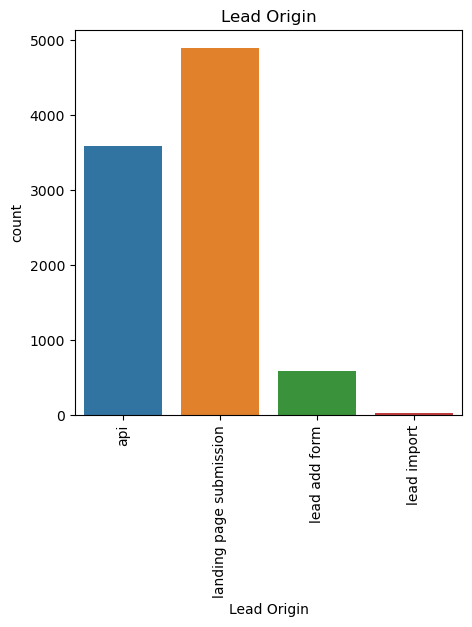

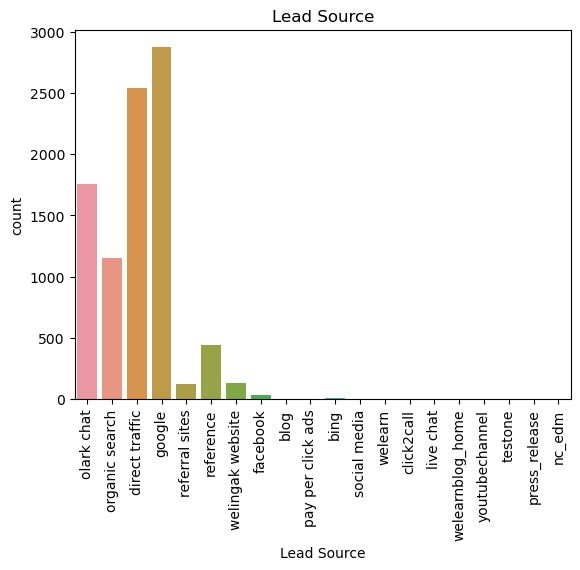

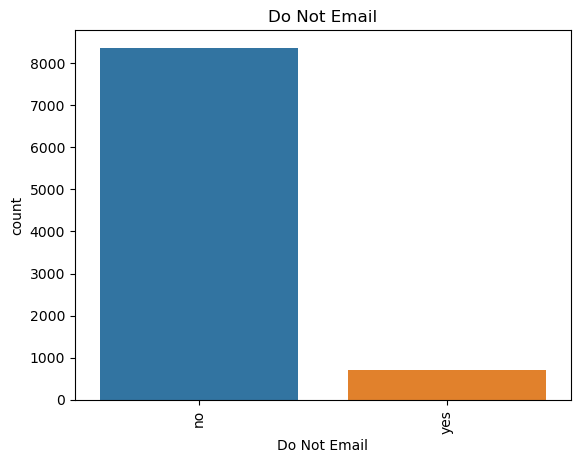

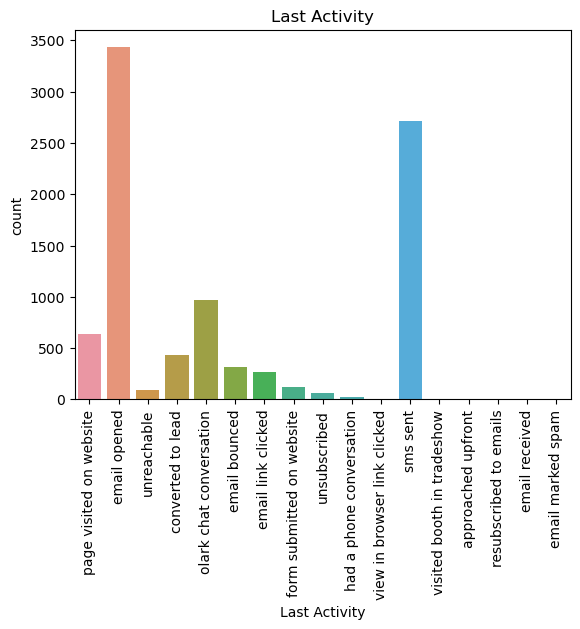

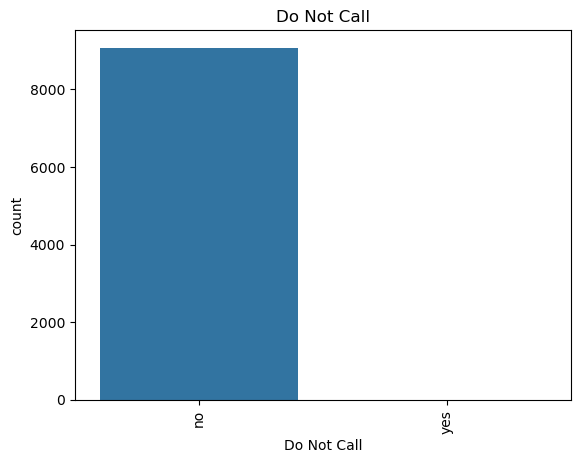

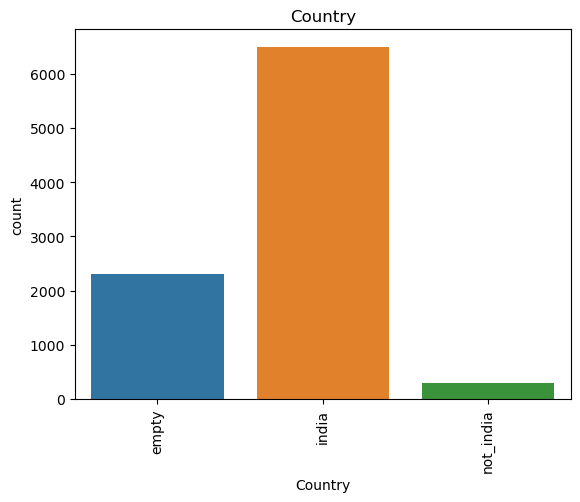

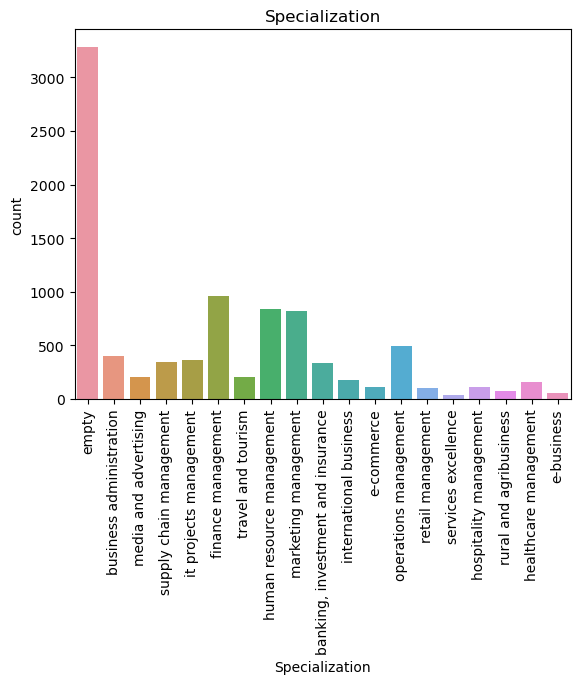

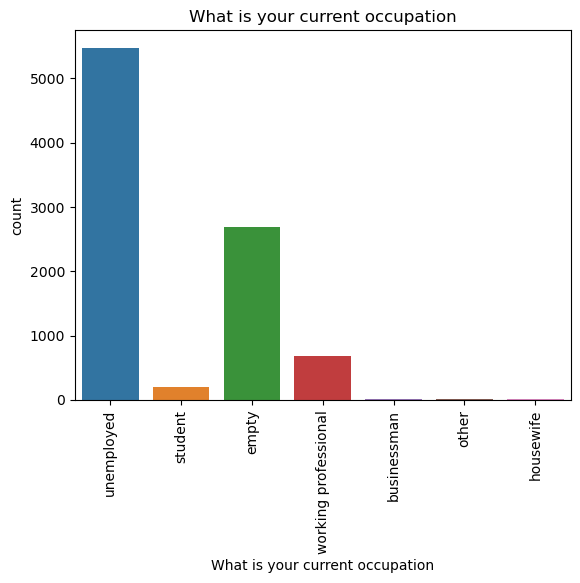

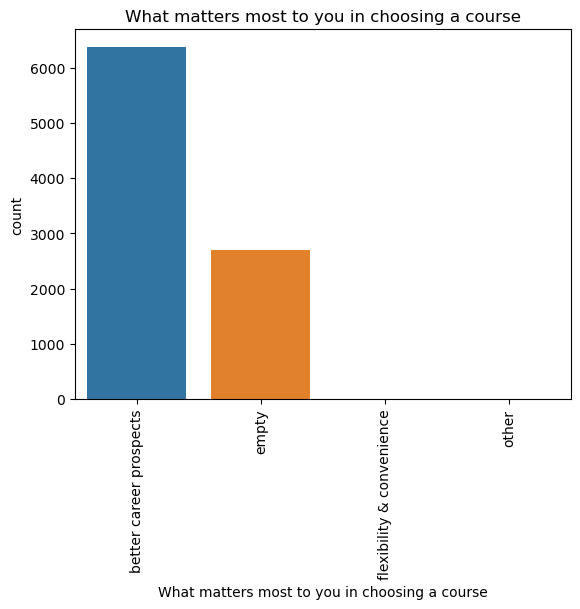

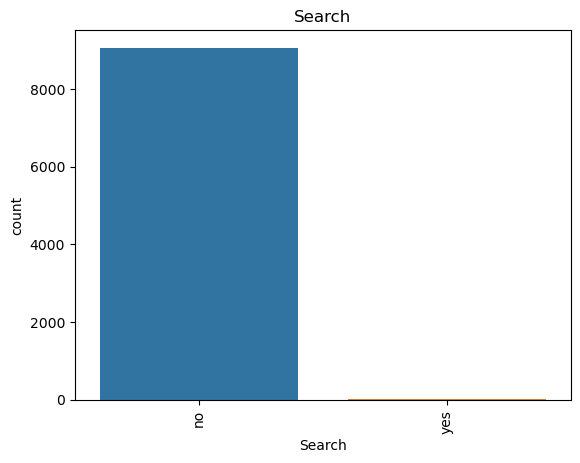

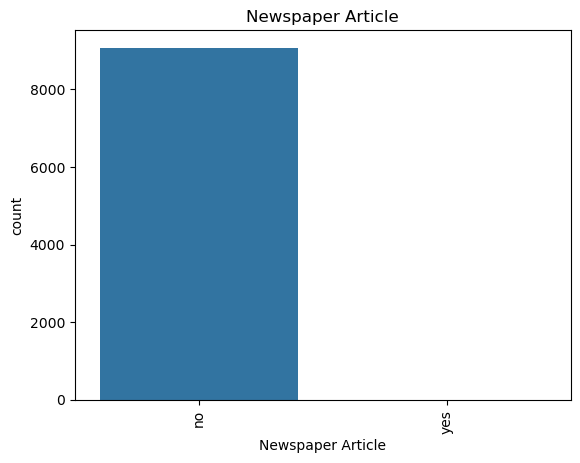

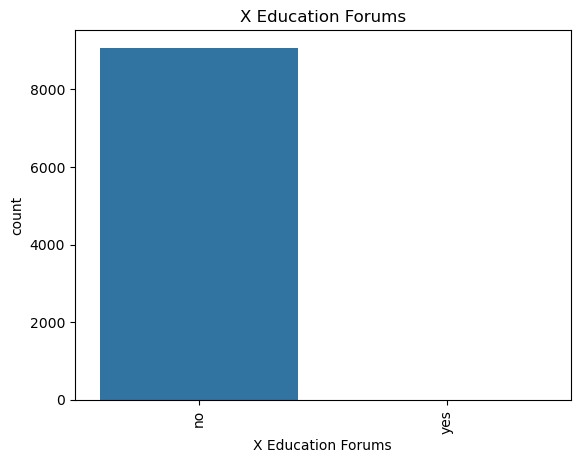

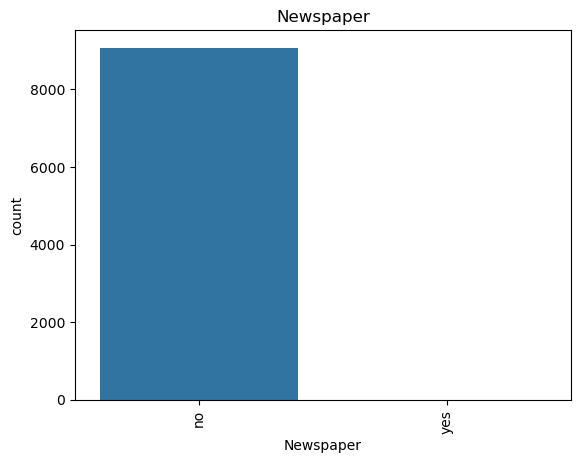

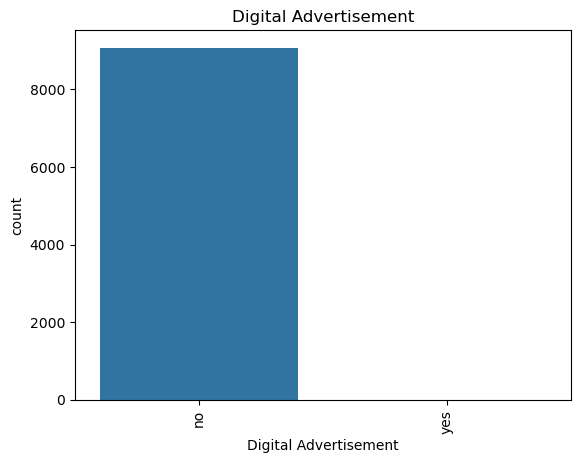

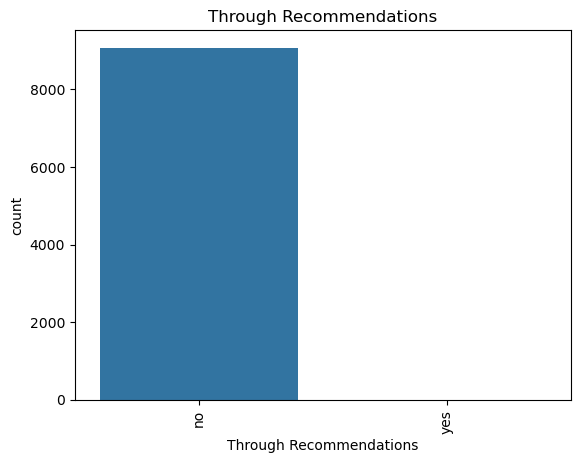

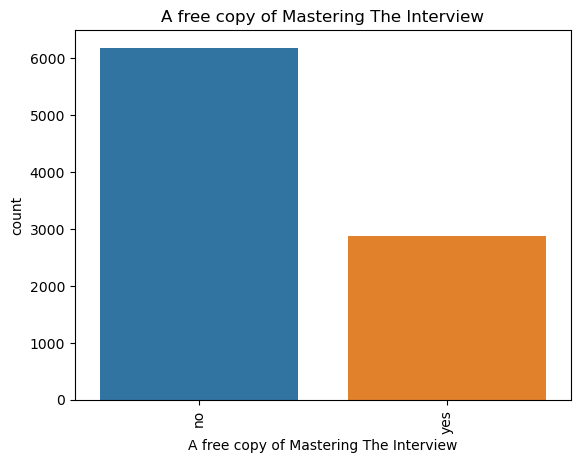

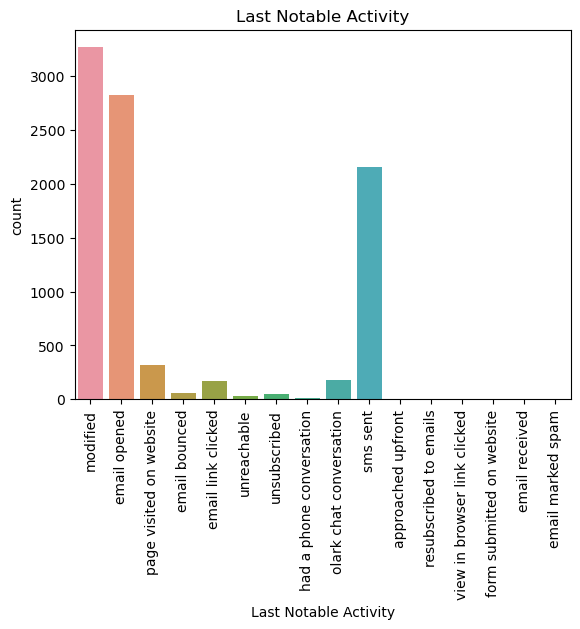

In [28]:
# making countplot for all categorical variables

plt.figure(figsize = (5,5))

def make_count(x):
    
    sns.countplot(data[x]).tick_params(axis='x', rotation = 90)
    plt.title(x)
    plt.show()

for element in cat:
    make_count(element)

#### - The landing page submission have the most count amongst the lead origin.
#### - Google is the main lead source.
#### - Opening the email is the most common last activity.
#### - Most leads are from india.
#### - Most leads are unemployed.
#### - People chose the course for a better future prospect the most.

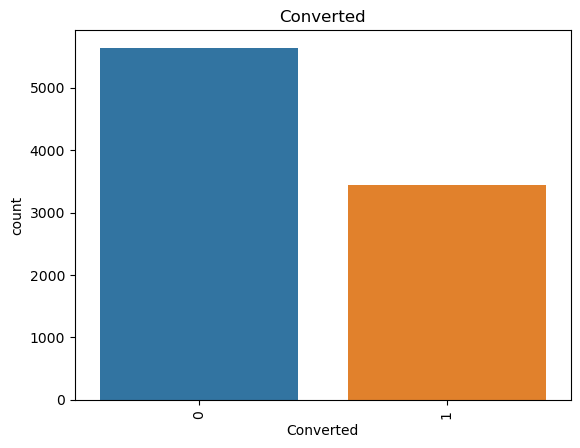

In [29]:
# now we check the countplot for the converted column

make_count('Converted')

# so most were not converted

#### - Most leads were not converted.so a little imbalance in data exists.

In [30]:
# making a list of numerical variables 
num = [ 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

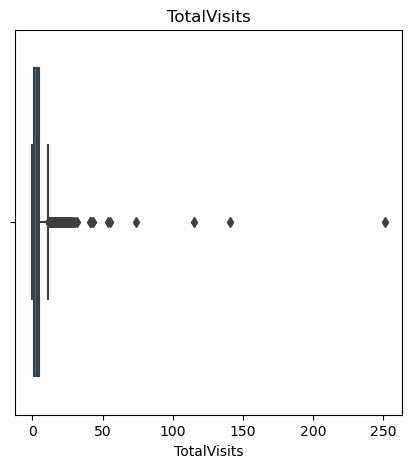

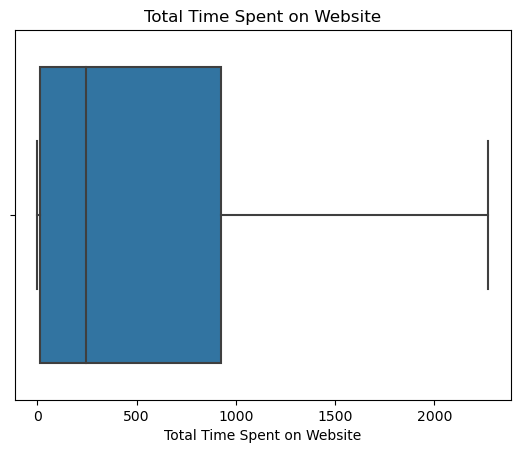

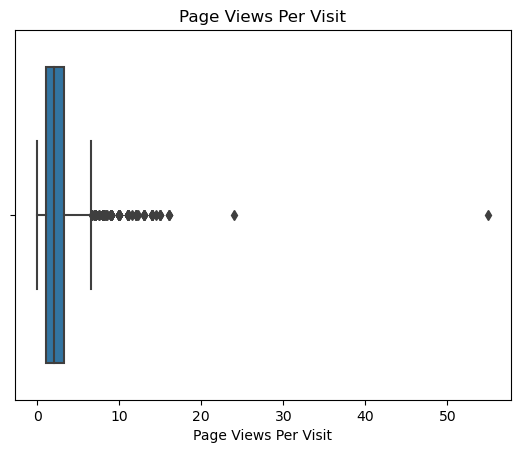

In [31]:
plt.figure(figsize = (5,5))

def make_bar(x):
    
    sns.boxplot(data[x])
    plt.title(x)
    plt.show()
    
for element in num:
    make_bar(element)
    

In [32]:
# The data seems to be free from any major outliers.

#### B) BI VARIATE ANALYSIS

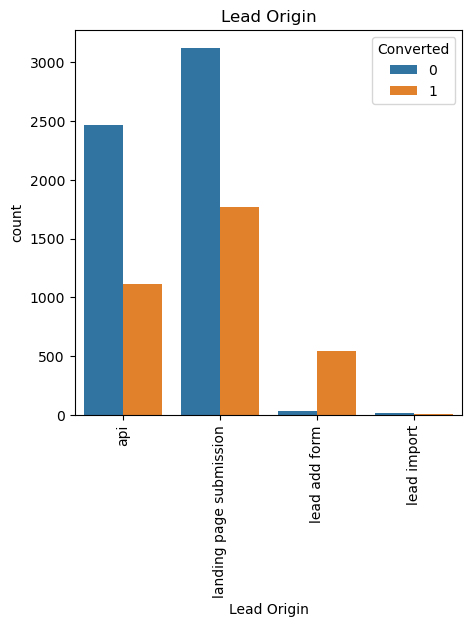

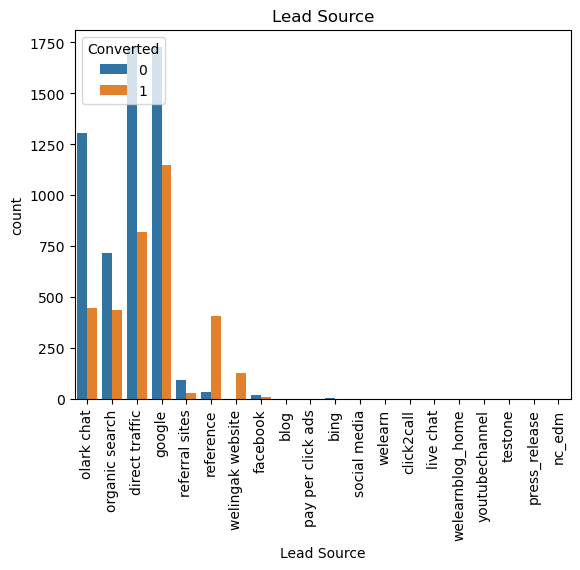

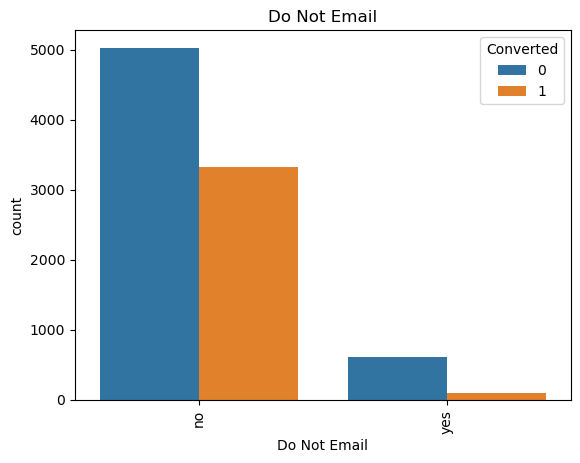

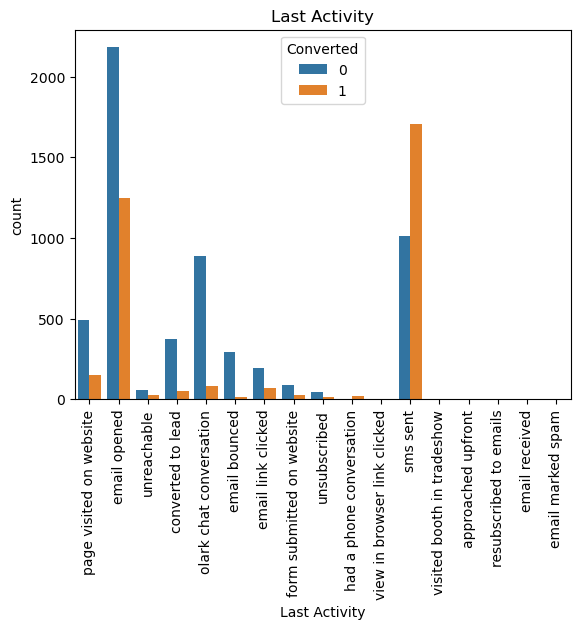

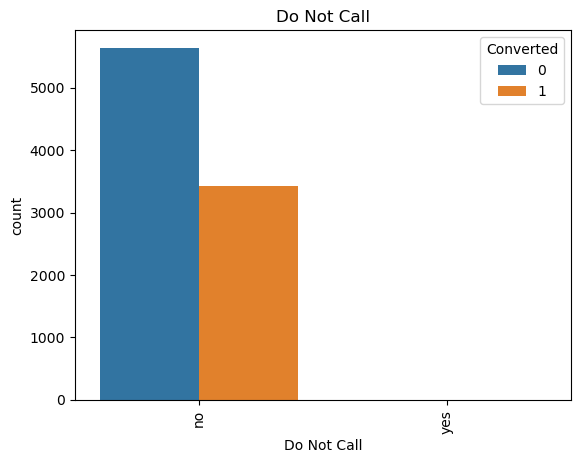

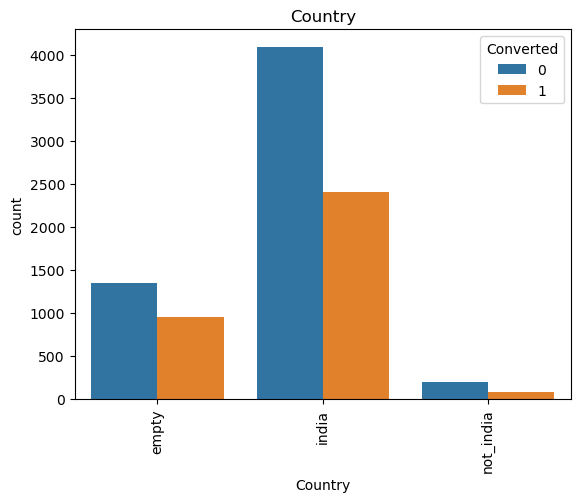

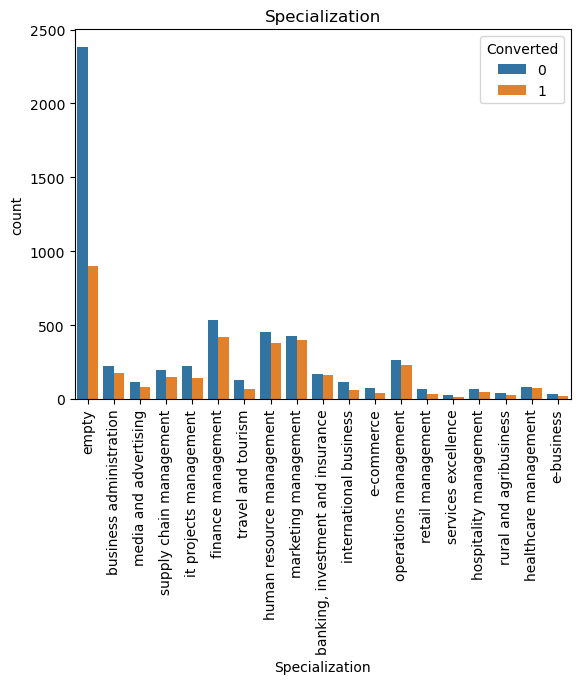

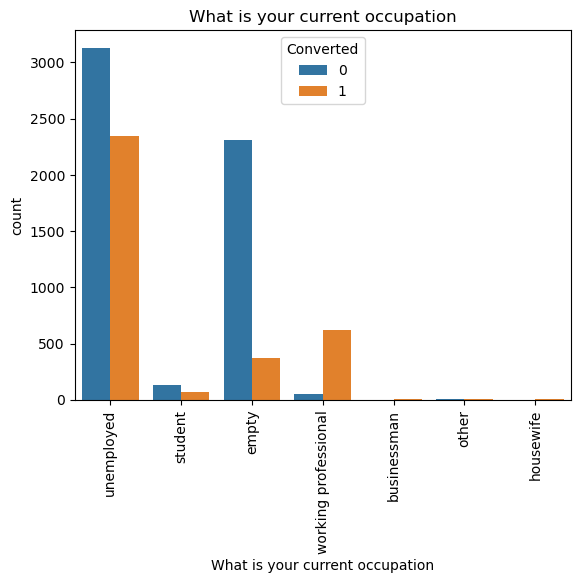

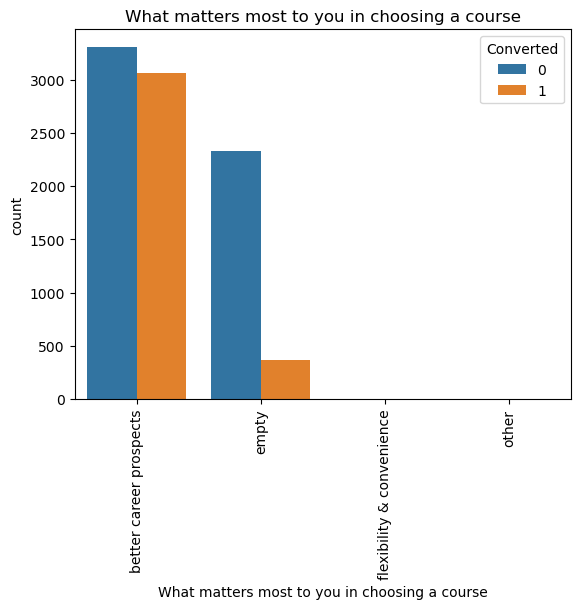

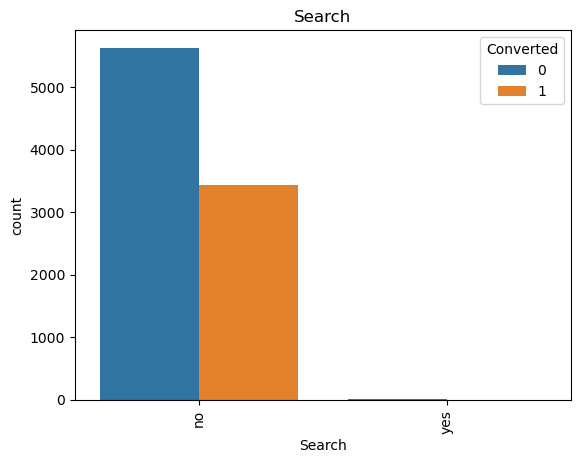

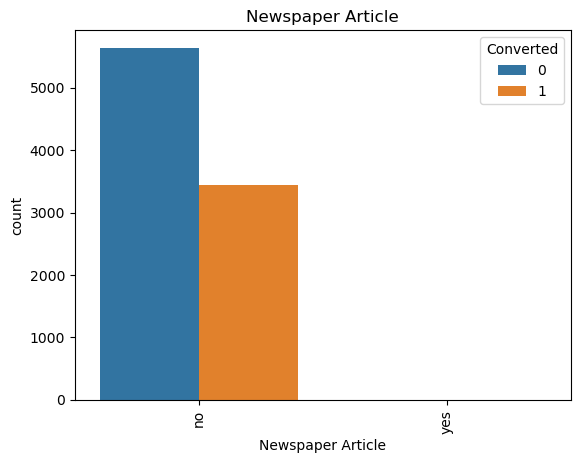

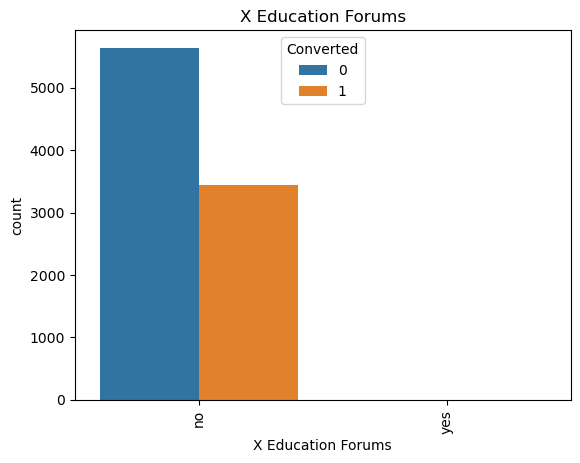

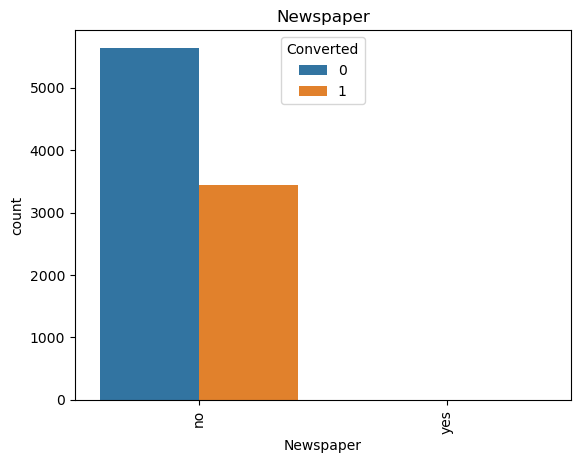

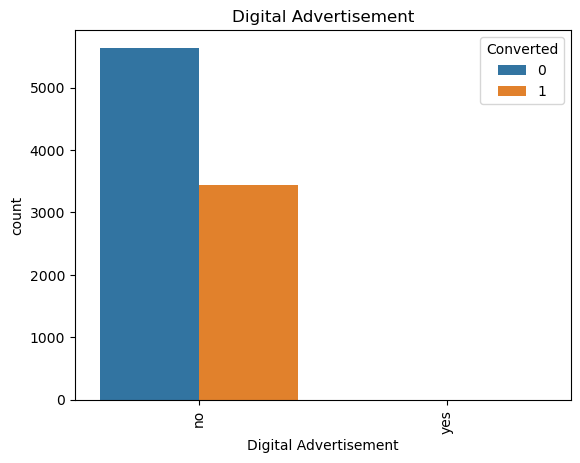

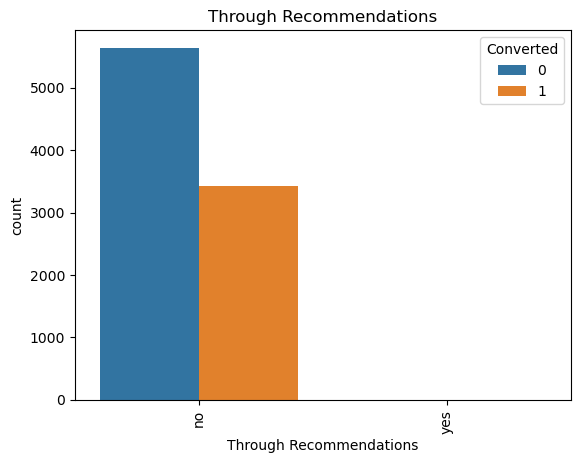

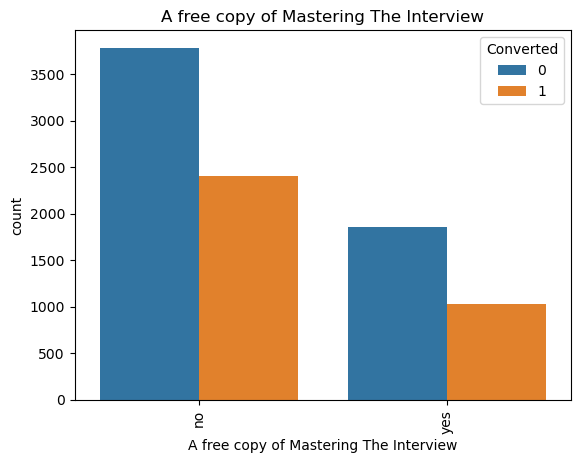

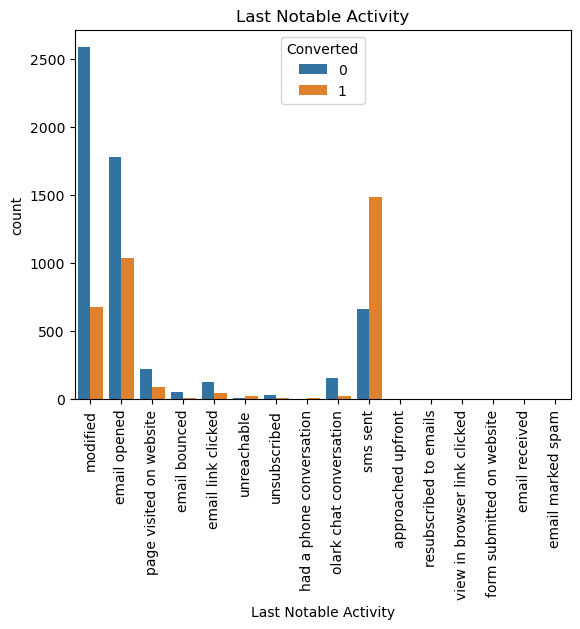

In [33]:
# finding the count of each category with respect to the conversion

plt.figure(figsize = (5,5))
def make_count1(xm):
    sns.countplot(x = xm , hue='Converted', data = data).tick_params(axis='x', rotation = 90)
    plt.title(xm)
    plt.show()

for element in cat:
    make_count1(element)

#### - We see leads with lead add form as lead origin were converted way more than others.
#### - Alse leads with reference as lead source were mostly converted.
#### - Leads with last activity of sms sent were converted more.
#### - Working professionals were the most converted leads amongst occupations.

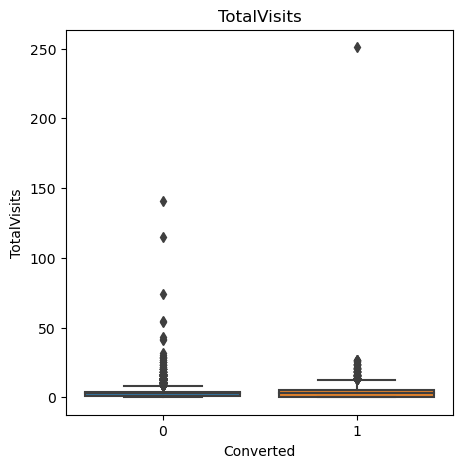

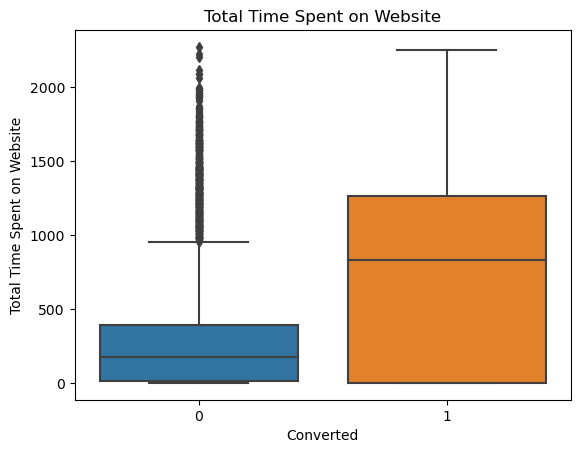

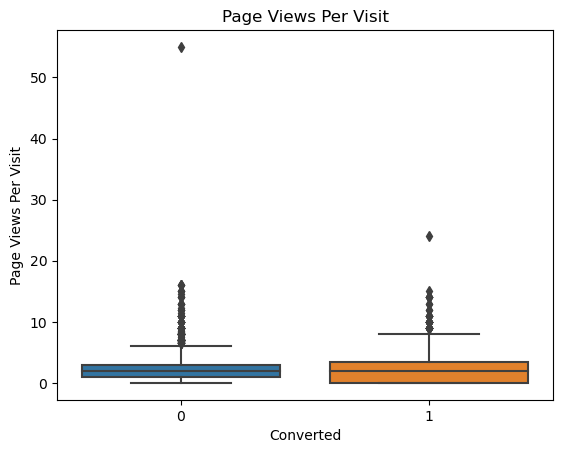

In [34]:
# inspecting the barplot of each numerical variable with respect to the conversion

plt.figure(figsize = (5,5))
def make_box1(xm):
    sns.boxplot(y=xm , x='Converted', data = data)
    plt.title(xm)
    plt.show()


for element in num:
    make_box1(element)

#### - Leads which convert spent more time on the website 

### 5. DUMMY VARIABLE CREATION

In [36]:
# creating dummies for categorical variables

dummy = pd.get_dummies(data[cat])

In [37]:
# merging the new variable with orignal database

mod_data = pd.concat([data, dummy], axis=1)
mod_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_no,Do Not Email_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Do Not Call_no,Do Not Call_yes,Country_empty,Country_india,Country_not_india,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_empty,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_businessman,What is your current occupation_empty,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_empty,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Search_no,Search_yes,Newspaper Article_no,Newspaper Article_yes,X Education Forums_no,X Education Forums_yes,Newspaper_no,Newspaper_yes,Digital Advertisement_no,Digital Advertisement_yes,Through Recommendations_no,Through Recommendations_yes,A free copy of Mastering The Interview_no,A free copy of Mastering The Interview_yes,Last Notable Activity_approached upfront,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,empty,empty,unemployed,better career prospects,no,no,no,no,no,no,no,modified,1,0,0,0,0,0,0,0,0,0,0,0,1,

In [38]:
mod_data.shape

(9074, 129)

In [39]:
# removing the orignal categorical columns for which dummies were created

mod_data = mod_data.drop(cat,axis=1)
mod_data.shape

(9074, 112)

### 6. TRAIN-TEST SPLIT

In [40]:
# importing the test train split 

from sklearn.model_selection import train_test_split

In [41]:
# Seperating out the target column

X = mod_data.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_no,Do Not Email_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Do Not Call_no,Do Not Call_yes,Country_empty,Country_india,Country_not_india,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_empty,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_businessman,What is your current occupation_empty,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_empty,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Search_no,Search_yes,Newspaper Article_no,Newspaper Article_yes,X Education Forums_no,X Education Forums_yes,Newspaper_no,Newspaper_yes,Digital Advertisement_no,Digital Advertisement_yes,Through Recommendations_no,Through Recommendations_yes,A free copy of Mastering The Interview_no,A free copy of Mastering The Interview_yes,Last Notable Activity_approached upfront,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,1,0,0,0,0,

In [42]:

y = mod_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the dataset into 75% and 25% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25 , random_state=100)

In [44]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scaling the numeric features
scaler = MinMaxScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_no,Do Not Email_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Do Not Call_no,Do Not Call_yes,Country_empty,Country_india,Country_not_india,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_empty,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_businessman,What is your current occupation_empty,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_empty,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Search_no,Search_yes,Newspaper Article_no,Newspaper Article_yes,X Education Forums_no,X Education Forums_yes,Newspaper_no,Newspaper_yes,Digital Advertisement_no,Digital Advertisement_yes,Through Recommendations_no,Through Recommendations_yes,A free copy of Mastering The Interview_no,A free copy of Mastering The Interview_yes,Last Notable Activity_approached upfront,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
5885,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8505,0.027888,0.757482,0.145833,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8

In [45]:
X_train.describe()
# the data looks well within limits.

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_no,Do Not Email_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Do Not Call_no,Do Not Call_yes,Country_empty,Country_india,Country_not_india,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_empty,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_businessman,What is your current occupation_empty,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_empty,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Search_no,Search_yes,Newspaper Article_no,Newspaper Article_yes,X Education Forums_no,X Education Forums_yes,Newspaper_no,Newspaper_yes,Digital Advertisement_no,Digital Advertisement_yes,Through Recommendations_no,Through Recommendations_yes,A free copy of Mastering The Interview_no,A free copy of Mastering The Interview_yes,Last Notable Activity_approached upfront,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
count,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000

### 7. MODEL BUILDING

In [46]:
# importing the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [47]:
# instantiating the logistic regression

lr = LogisticRegression()


In [48]:
# selecting 15 features through rfe 

rfe = RFE(lr ,n_features_to_select= 15)

rfe = rfe.fit(X_train , y_train)


In [49]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_api', False, 81),
 ('Lead Origin_landing page submission', False, 3),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 63),
 ('Lead Source_bing', False, 71),
 ('Lead Source_blog', False, 59),
 ('Lead Source_click2call', False, 21),
 ('Lead Source_direct traffic', False, 41),
 ('Lead Source_facebook', False, 23),
 ('Lead Source_google', False, 52),
 ('Lead Source_live chat', False, 57),
 ('Lead Source_nc_edm', False, 12),
 ('Lead Source_olark chat', False, 64),
 ('Lead Source_organic search', False, 47),
 ('Lead Source_pay per click ads', False, 58),
 ('Lead Source_press_release', False, 89),
 ('Lead Source_reference', False, 34),
 ('Lead Source_referral sites', False, 50),
 ('Lead Source_social media', False, 28),
 ('Lead Source_testone', False, 51),
 ('Lead Source_welearn', False, 44),
 ('Lead Source_welearnblog_home', False, 65),
 ('Le

In [50]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_welingak website',
       'Do Not Email_no', 'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Last Activity_unsubscribed', 'Country_empty',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_better career prospects',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [51]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [52]:
# Importing statsmodels
import statsmodels.api as sm

In [53]:
# making the first model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6789
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.6
Date:                Fri, 14 Apr 2023   Deviance:                       5569.2
Time:                        20:57:51   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -5.4125      0.214    -25.251      0.000      -5.833      -4.992
TotalVisits                                                               9.8158      2.137      4.594      0.000       5.628      14.003
Total Time Spent on Website                                               4.6347      0.164     28.273      0.000       4.313       4.956
Lead Origin_lead add form                                                 2.2431      0.220     10.191      0.000       1.812       2.674
Lead Source_welingak website                                              2.0655      0.749      2.756      0.006       0.597       3.534
Do Not Email_no                                                           1.7862      0.181      9.882      0.000       1.432       2.140
Last Activity_had a phone conversation                                    1.4266      1.147      1.243      0.214      -0.822       3.675
Last Activity_olark chat conversation                                    -1.2900      0.158     -8.166      0.000      -1.600      -0.980
Last Activity_sms sent                                                    1.3154      0.072     18.191      0.000       1.174       1.457
Last Activity_unsubscribed                                                1.5640      0.443      3.529      0.000       0.695       2.433
Country_empty                                                             1.6247      0.110     14.721      0.000       1.408       1.841
What is your current occupation_housewife                                22.8816   1.59e+04      0.001      0.999   -3.11e+04    3.11e+04
What is your current occupation_working professional                      2.4197      0.178     13.566      0.000       2.070       2.769
What matters most to you in choosing a course_better career prospects     1.2945      0.085     15.262      0.000       1.128       1.461
Last Notable Activity_had a phone conversation                            2.2160      1.602      1.383      0.167      -0.924       5.356
Last Notable Activity_unreachable                                         2.0924      0.492      4.257      0.000       1.129       3.056
=========================================================================================================================================
"""

In [54]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Make a VIF dataframe
def make_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

make_vif(X_train)

,Features,VIF
4,Do Not Email_no,5.13
12,What matters most to you in choosing a course_...,3.47
5,Last Activity_had a phone conversation,3.17
13,Last Notable Activity_had a phone conversation,3.17
9,Country_empty,2.43
1,Total Time Spent on Website,2.32
2,Lead Origin_lead add form,1.88
0,TotalVisits,1.62
7,Last Activity_sms sent,1.59
6,Last Activity_olark chat conversation,1.42


In [56]:
# dropping What is your current occupation_housewife as it has high p value

X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [57]:
# Refitting the model

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.5
Date:                Fri, 14 Apr 2023   Deviance:                       5579.1
Time:                        20:57:51   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -5.4078      0.214    -25.239      0.000      -5.828      -4.988
TotalVisits                                                               9.7310      2.131      4.565      0.000       5.553      13.909
Total Time Spent on Website                                               4.6296      0.164     28.289      0.000       4.309       4.950
Lead Origin_lead add form                                                 2.2785      0.220     10.364      0.000       1.848       2.709
Lead Source_welingak website                                              2.0323      0.749      2.712      0.007       0.563       3.501
Do Not Email_no                                                           1.7889      0.181      9.896      0.000       1.435       2.143
Last Activity_had a phone conversation                                    1.4187      1.148      1.236      0.216      -0.831       3.668
Last Activity_olark chat conversation                                    -1.2920      0.158     -8.178      0.000      -1.602      -0.982
Last Activity_sms sent                                                    1.3097      0.072     18.125      0.000       1.168       1.451
Last Activity_unsubscribed                                                1.5614      0.443      3.524      0.000       0.693       2.430
Country_empty                                                             1.6155      0.110     14.672      0.000       1.400       1.831
What is your current occupation_working professional                      2.4141      0.178     13.536      0.000       2.065       2.764
What matters most to you in choosing a course_better career prospects     1.2967      0.085     15.296      0.000       1.131       1.463
Last Notable Activity_had a phone conversation                            2.2173      1.603      1.384      0.166      -0.924       5.358
Last Notable Activity_unreachable                                         2.0871      0.492      4.245      0.000       1.124       3.051
=========================================================================================================================================
"""

In [58]:
# Again making a VIF dataframe

make_vif(X_train)

,Features,VIF
4,Do Not Email_no,5.13
11,What matters most to you in choosing a course_...,3.47
5,Last Activity_had a phone conversation,3.17
12,Last Notable Activity_had a phone conversation,3.17
9,Country_empty,2.43
1,Total Time Spent on Website,2.32
2,Lead Origin_lead add form,1.88
0,TotalVisits,1.62
7,Last Activity_sms sent,1.58
6,Last Activity_olark chat conversation,1.42


In [59]:
# dropping Last Activity_had a phone conversation as it has high p value

X_train.drop('Last Activity_had a phone conversation', axis = 1, inplace = True)


In [60]:
# Refitting the model

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2790.4
Date:                Fri, 14 Apr 2023   Deviance:                       5580.8
Time:                        20:57:51   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -5.4067      0.214    -25.224      0.000      -5.827      -4.987
TotalVisits                                                               9.7535      2.132      4.574      0.000       5.574      13.933
Total Time Spent on Website                                               4.6309      0.164     28.303      0.000       4.310       4.952
Lead Origin_lead add form                                                 2.2829      0.220     10.387      0.000       1.852       2.714
Lead Source_welingak website                                              2.0272      0.749      2.705      0.007       0.558       3.496
Do Not Email_no                                                           1.7883      0.181      9.889      0.000       1.434       2.143
Last Activity_olark chat conversation                                    -1.2936      0.158     -8.188      0.000      -1.603      -0.984
Last Activity_sms sent                                                    1.3074      0.072     18.100      0.000       1.166       1.449
Last Activity_unsubscribed                                                1.5586      0.443      3.517      0.000       0.690       2.427
Country_empty                                                             1.6149      0.110     14.667      0.000       1.399       1.831
What is your current occupation_working professional                      2.4120      0.178     13.525      0.000       2.062       2.762
What matters most to you in choosing a course_better career prospects     1.2983      0.085     15.317      0.000       1.132       1.464
Last Notable Activity_had a phone conversation                            3.6338      1.120      3.243      0.001       1.438       5.830
Last Notable Activity_unreachable                                         2.0852      0.492      4.241      0.000       1.122       3.049
=========================================================================================================================================
"""

In [61]:
# Again making a VIF dataframe

make_vif(X_train)

,Features,VIF
4,Do Not Email_no,5.13
10,What matters most to you in choosing a course_...,3.47
8,Country_empty,2.43
1,Total Time Spent on Website,2.32
2,Lead Origin_lead add form,1.88
0,TotalVisits,1.62
6,Last Activity_sms sent,1.58
5,Last Activity_olark chat conversation,1.42
3,Lead Source_welingak website,1.33
9,What is your current occupation_working profes...,1.20


In [62]:
# dropping Do Not Email_no as it has high VIF

X_train.drop('Do Not Email_no', axis = 1, inplace = True)

In [63]:
# Refitting the model

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6792
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.9
Date:                Fri, 14 Apr 2023   Deviance:                       5707.8
Time:                        20:57:52   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3888
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.7064      0.111    -33.356      0.000      -3.924      -3.489
TotalVisits                                                               8.7608      2.229      3.930      0.000       4.392      13.130
Total Time Spent on Website                                               4.6499      0.161     28.819      0.000       4.334       4.966
Lead Origin_lead add form                                                 2.2732      0.219     10.397      0.000       1.845       2.702
Lead Source_welingak website                                              1.8681      0.746      2.503      0.012       0.406       3.331
Last Activity_olark chat conversation                                    -1.2398      0.158     -7.868      0.000      -1.549      -0.931
Last Activity_sms sent                                                    1.2702      0.071     17.880      0.000       1.131       1.409
Last Activity_unsubscribed                                               -0.0342      0.414     -0.083      0.934      -0.845       0.777
Country_empty                                                             1.6162      0.110     14.758      0.000       1.402       1.831
What is your current occupation_working professional                      2.4298      0.176     13.801      0.000       2.085       2.775
What matters most to you in choosing a course_better career prospects     1.3159      0.084     15.718      0.000       1.152       1.480
Last Notable Activity_had a phone conversation                            3.7273      1.121      3.326      0.001       1.531       5.924
Last Notable Activity_unreachable                                         2.1402      0.484      4.417      0.000       1.191       3.090
=========================================================================================================================================
"""

In [64]:
# Again making a VIF dataframe

make_vif(X_train)

,Features,VIF
9,What matters most to you in choosing a course_...,2.52
7,Country_empty,2.02
1,Total Time Spent on Website,1.98
2,Lead Origin_lead add form,1.87
5,Last Activity_sms sent,1.55
0,TotalVisits,1.48
4,Last Activity_olark chat conversation,1.37
3,Lead Source_welingak website,1.33
8,What is your current occupation_working profes...,1.20
6,Last Activity_unsubscribed,1.01


In [65]:
# dropping Last Activity_unsubscribed as it has high p value

X_train.drop('Last Activity_unsubscribed', axis = 1, inplace = True)


In [66]:
# Refitting the model

X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6793
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.9
Date:                Fri, 14 Apr 2023   Deviance:                       5707.8
Time:                        20:57:52   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3888
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.7068      0.111    -33.400      0.000      -3.924      -3.489
TotalVisits                                                               8.7622      2.229      3.931      0.000       4.393      13.131
Total Time Spent on Website                                               4.6499      0.161     28.819      0.000       4.334       4.966
Lead Origin_lead add form                                                 2.2734      0.219     10.399      0.000       1.845       2.702
Lead Source_welingak website                                              1.8681      0.746      2.503      0.012       0.406       3.331
Last Activity_olark chat conversation                                    -1.2394      0.158     -7.869      0.000      -1.548      -0.931
Last Activity_sms sent                                                    1.2706      0.071     17.925      0.000       1.132       1.410
Country_empty                                                             1.6163      0.110     14.759      0.000       1.402       1.831
What is your current occupation_working professional                      2.4299      0.176     13.801      0.000       2.085       2.775
What matters most to you in choosing a course_better career prospects     1.3159      0.084     15.718      0.000       1.152       1.480
Last Notable Activity_had a phone conversation                            3.7277      1.121      3.326      0.001       1.531       5.924
Last Notable Activity_unreachable                                         2.1406      0.484      4.418      0.000       1.191       3.090
=========================================================================================================================================
"""

In [67]:
# Again making a VIF dataframe

make_vif(X_train)

,Features,VIF
8,What matters most to you in choosing a course_...,2.51
6,Country_empty,2.02
1,Total Time Spent on Website,1.98
2,Lead Origin_lead add form,1.87
5,Last Activity_sms sent,1.54
0,TotalVisits,1.48
4,Last Activity_olark chat conversation,1.37
3,Lead Source_welingak website,1.33
7,What is your current occupation_working profes...,1.20
9,Last Notable Activity_had a phone conversation,1.00


In [68]:
# the vif values are less than 3 and p values are all less than 0.05

### 8. MAKING PREDICTIONS

In [69]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
# reshapig the array
y_train_pred = y_train_pred.values.reshape(-1)

In [70]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.034558
1,1,0.993795
2,0,0.033769
3,0,0.315491
4,1,0.573150


In [71]:
# introducing a cutoff 0.5 in probability of conversion
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.034558,0
1,1,0.993795,1
2,0,0.033769,0
3,0,0.315491,0
4,1,0.573150,1


### 9. MODEL EVALUATION

In [72]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Creating confusion matrix 
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf_matrix

array([[3714,  484],
       [ 814, 1793]], dtype=int64)

In [73]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8092578986039677

#### The accuracy seems good 

In [74]:
# true positive
TP = conf_matrix[1,1]

# true negatives
TN = conf_matrix[0,0]

# false positives
FP = conf_matrix[0,1] 

# false negatives
FN = conf_matrix[1,0]


In [75]:
# Calculating the sensitivity
TP/(TP+FN)

0.6877637130801688

In [76]:
# Calculating the specificity
TN/(TN+FP)

0.8847070033349214

#### For a cut off of 0.5 we have an accuracy of 0.809 and sensitivity and specificity of 0.688 and 0.885 respectively

### 10. OPTIMIZING THE CUT OFF

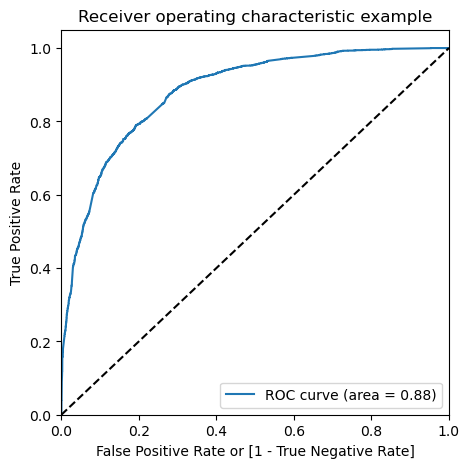

In [77]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

In [78]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.034558,0,1,0,0,0,0,0,0,0,0,0
1,1,0.993795,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033769,0,1,0,0,0,0,0,0,0,0,0
3,0,0.315491,0,1,1,1,1,0,0,0,0,0,0
4,1,0.573150,1,1,1,1,1,1,1,0,0,0,0


In [79]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.383101,1.000000,0.000000
0.1,0.1,0.568406,0.984273,0.310148
0.2,0.2,0.754886,0.913694,0.656265
0.3,0.3,0.780309,0.868048,0.725822
0.4,0.4,0.804555,0.753356,0.836351
0.5,0.5,0.809258,0.687764,0.884707
0.6,0.6,0.798824,0.617185,0.911625
0.7,0.7,0.775753,0.503260,0.944974
0.8,0.8,0.755033,0.413502,0.967127
0.9,0.9,0.706833,0.255082,0.987375


<Figure size 3000x700 with 0 Axes>

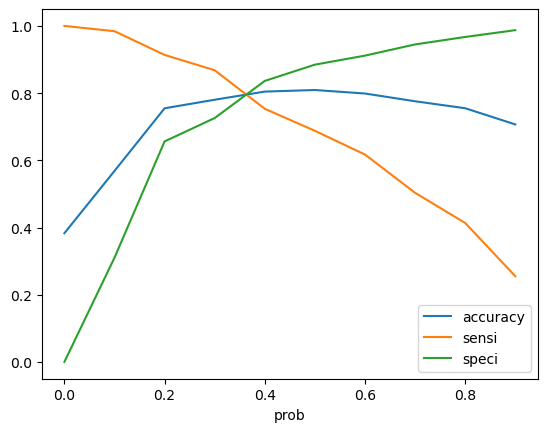

In [80]:
# Plotting it
plt.figure(figsize=(30,7))

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### the cut off of 0.4 seems better so changing the cut off

In [81]:
# introducing a cutoff 0.4
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.034558,0,1,0,0,0,0,0,0,0,0,0
1,1,0.993795,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033769,0,1,0,0,0,0,0,0,0,0,0
3,0,0.315491,0,1,1,1,1,0,0,0,0,0,0
4,1,0.573150,1,1,1,1,1,1,1,0,0,0,0


In [82]:
# Creating confusion matrix 
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf_matrix

array([[3511,  687],
       [ 643, 1964]], dtype=int64)

In [83]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.804555473916238

In [84]:
# true positive
TP = conf_matrix[1,1]

# true negatives
TN = conf_matrix[0,0]

# false positives
FP = conf_matrix[0,1] 

# false negatives
FN = conf_matrix[1,0]


In [85]:
# Calculating the sensitivity
TP/(TP+FN)

0.7533563482930572

In [86]:
# Calculating the specificity
TN/(TN+FP)

0.8363506431634111

#### For a cut off of 0.4 we have an accuracy of 0.805 and sensitivity and specificity of 0.753 and 0.836 respectively

### 11. PREDICTIONS ON THE TEST SET

In [87]:
# Scaling numeric columns
X_test[num] = scaler.transform(X_test[num])


In [88]:
# Select the columns in X_train for X_test as well
col = X_train.columns

X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Last Activity_olark chat conversation,Last Activity_sms sent,Country_empty,What is your current occupation_working professional,What matters most to you in choosing a course_better career prospects,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
3271,1.0,0.015936,0.069102,0,0,0,0,0,0,0,0,0
1490,1.0,0.019920,0.665933,0,0,0,0,0,1,1,0,0
7936,1.0,0.007968,0.032570,0,0,0,0,0,0,0,0,0
4216,1.0,0.000000,0.000000,1,0,0,0,1,0,1,0,0
3830,1.0,0.031873,0.072183,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7748,1.0,0.047809,0.679137,0,0,0,0,0,0,1,0,0
5538,1.0,0.215139,0.563380,0,0,0,1,0,0,0,0,0
1232,1.0,0.000000,0.000000,0,0,1,0,1,0,0,0,0
1457,1.0,0.000000,0.000000,0,0,0,0,1,0,1,0,0


In [89]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.037476
1,1,0.964773
2,0,0.029726
3,1,0.817400
4,0,0.043443


In [90]:
# Making prediction using cut off 0.4
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.037476,0
1,1,0.964773,1
2,0,0.029726,0
3,1,0.817400,1
4,0,0.043443,0
...,...,...,...
2264,0,0.766021,1
2265,0,0.887813,1
2266,0,0.034558,0
2267,0,0.315491,0


In [91]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8188629352137505

In [92]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1227,  214],
       [ 197,  631]], dtype=int64)

In [93]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [94]:
# Calculating the sensitivity
TP/(TP+FN)

0.7620772946859904

In [95]:
# Calculating the specificity
TN/(TN+FP)

0.8514920194309508

#### For a cut off of 0.4 we have an accuracy of 0.819 and sensitivity and specificity of 0.762 and 0.851 respectively on test set

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3511,  687],
       [ 643, 1964]], dtype=int64)

In [97]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7408525084873633

In [98]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7533563482930572

#### we have a precision and recall od 0.74 and 0.75 for a cut off of 0.4
#### we can increase the recall for the model so as to catch more clients who will convert .

### 12. ASSIGNING A LEAD SCORE

#### We have already found the probabilities of conversion.
#### We can multiply that probability with 100 and form a new column.
#### This would be the lead score where a score of 100 means pure cahnce of conversion .
#### the cutoff would be at 40 according to our model where a lead score above 40 would mean conversion with an accuracy of about 82%

### 13. CONCLUSION

#### So overall we built a logistic regression model with a good accuracy of 81.9% with a cut off of 0.4.
#### From EDA we found most leads were from india and they were unemployed.
#### Working professionals were the most converted leads and referred leads had good chances of conversion.
#### People with sms as the last activity and spend more time on website too had good chances of conversion.
#### Welingak website provides very good leads and must be worked upon.
#### Most people opt for the course for better future prospects.
#### Overall the company must target referred working professionals from india who will take the course for better future prospect .